# IMDB top 1000 Movies Analysis

### Importing Libraries & Loading Dataset

In [63]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv('imdb.csv')

# Displaying some rows from dataset
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

### data cleaning & preprocessing

In [64]:
# Removing duplicates
df = df.drop_duplicates()

# replacing missing values with mean of the column 
df['IMDB_Rating'] = df['IMDB_Rating'].fillna(df['IMDB_Rating'].mean())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

# replacing missing values with Zero & standardizing
df['Gross'] = df['Gross'].fillna(0)
df['Gross'] = df['Gross'].replace({',': '', '$': ''}, regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# replacing missing string values with Meaningfull values
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')

# Dropping columns that are not used in statistical analysis
df = df.drop(columns=['Poster_Link', 'Overview', 'Star1', 'Star2', 'Star3', 'Star4'])
df = df[df['Gross'] > 0]

# Remove ' min' from the 'Runtime' column and convert it to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,831.000000,831.000000,831.000000,8.310000e+02,8.310000e+02
mean,124.078219,7.946931,77.509860,3.152499e+05,6.803475e+07
std,27.501455,0.283204,11.869645,3.436443e+05,1.097500e+08
min,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,104.000000,7.700000,71.000000,7.143000e+04,3.253559e+06
50%,120.000000,7.900000,77.971530,1.867340e+05,2.353089e+07
75%,138.000000,8.100000,85.500000,4.457210e+05,8.075089e+07
max,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### Histogram of IMDb Ratings

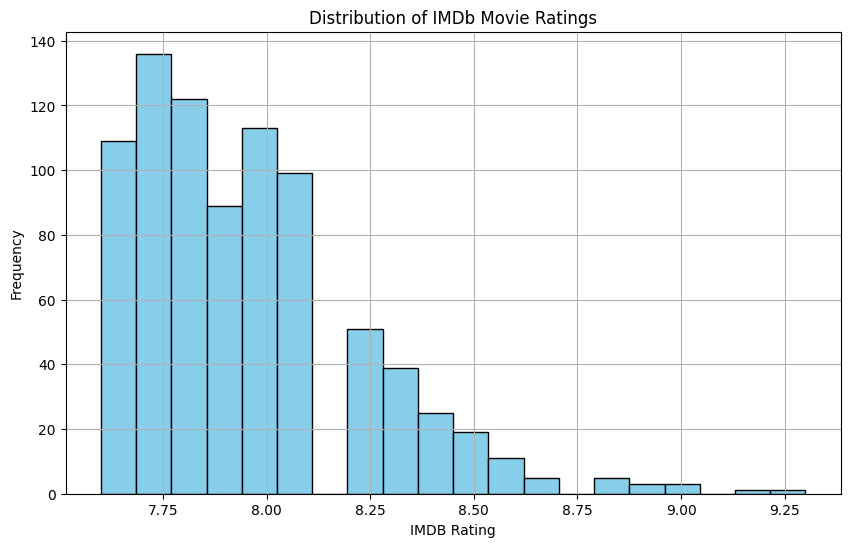

In [65]:
# Plotting a histogram of IMDb ratings
plt.figure(figsize=(10, 6))
plt.hist(df['IMDB_Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Movie Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Histogram of Runtime of movie

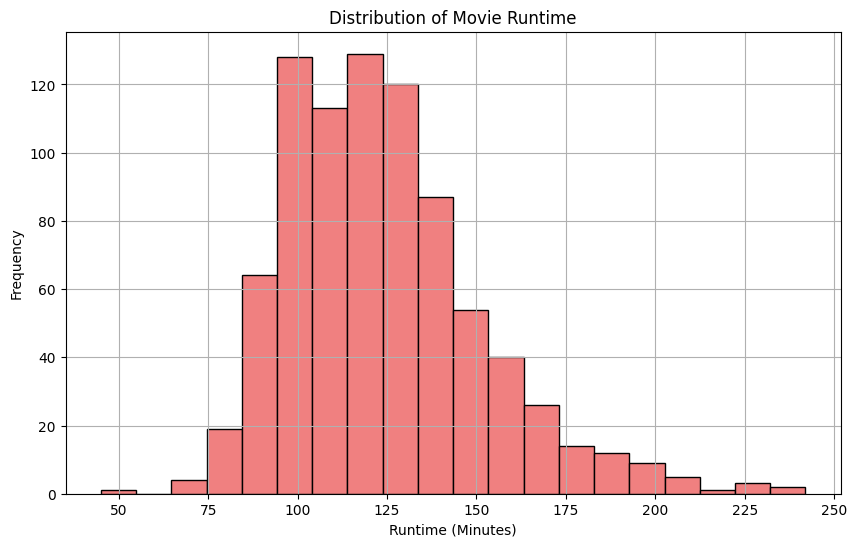

In [66]:
# Plotting a histogram of Movie Runtime
plt.figure(figsize=(10, 6))
plt.hist(df['Runtime'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Line Graph of Gross Revenue Over Time

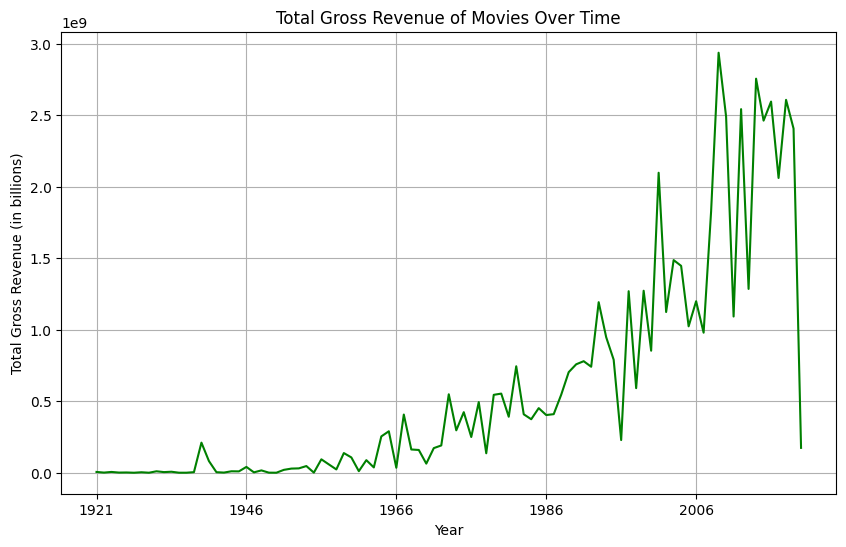

In [67]:
# Group by 'Released_Year' and sum the gross revenue for each year
gross_by_year = df.groupby('Released_Year')['Gross'].sum()

# Plotting a line graph of the movie's gross revenue over the years
plt.figure(figsize=(10, 6))
gross_by_year.plot(kind='line', color='green')
plt.title('Total Gross Revenue of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue (in billions)')
plt.grid(True)
plt.show()

### Correlation Heatmap

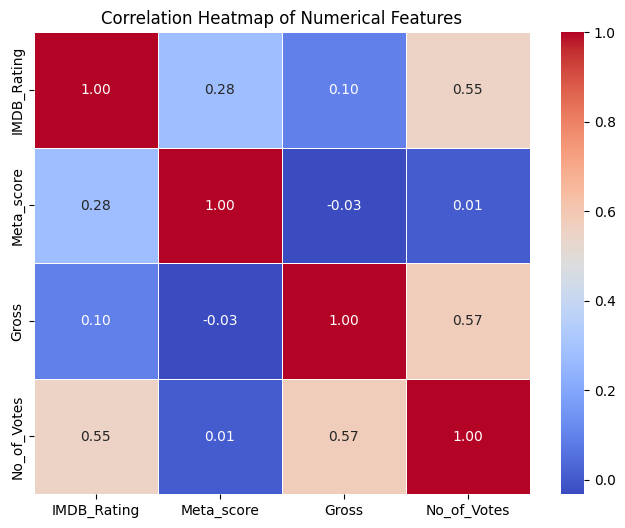

In [68]:
# Select numerical columns for correlation plotting
numerical_cols = ['IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes']

corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()